In [1]:
import osmnx as ox
import pandas as pd
ox.config(log_console=True, use_cache=True)

E:\anaconda\envs\ox\lib\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [2]:
G = ox.graph_from_bbox(30.7147,30.9649,103.7139,104.0543, network_type='drive')

In [3]:
import networkx as nx

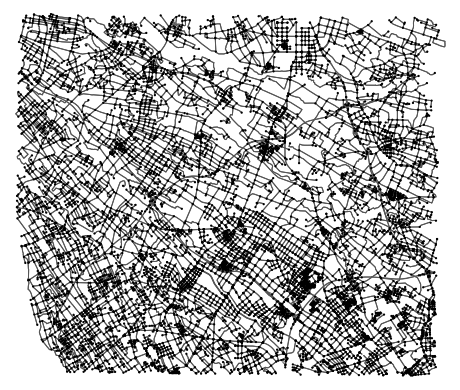

In [4]:
G = ox.project_graph(G)
fig, ax = ox.plot_graph(G, bgcolor='w', node_size=5, node_color='k', node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1, edge_alpha=1)

In [6]:
ox.save_graph_shapefile(G,filepath="..//data2//")

E:\anaconda\envs\ox\lib\site-packages\osmnx\io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


In [7]:
#计算拓扑性质
# print(nx.density(G))   #网络密度
# print(nx.degree_centrality(G))   #度中心性
# print(nx.closeness_centrality(G))  #接近中心性
# print(nx.degree(G))   #节点度
# print(nx.edge_betweenness(G))  #边介数
# print(nx.edge_betweenness_centrality(G)) #介数中心性
# print(nx.clustering(nx.Graph(G)))  #聚类系数
# print(nx.shortest_path_length(G,source=None, target=None, weight=None, method='dijkstra')) #最短路径长度

#一.保存边数据(以边介数为例)
dict_info=nx.edge_betweenness(G)
new_list=[]
for k,v in dict_info.items():
    one=k[0]
    two=k[1]
    new_list.append([one,two,v])

NameError: name 'pd' is not defined

In [10]:
pf=pd.DataFrame(new_list)
pf.to_csv("edge.csv",index=False,header=False)

In [10]:
#二.保存节点数据(以节点度为例)
dict_info = dict(nx.degree(G))
new_list=[[key,values] for key,values in dict_info.items()]
pf=pd.DataFrame(new_list)
# pf.to_csv("node.csv",index=False,header=False)

In [13]:
pf

,0,1
0,288416442,3
1,6784800960,4
2,9069147600,3
3,288416443,4
4,288416444,4
...,...,...
11646,10176053044,4
11647,10176053041,2
11648,10176053050,5
11649,10176053046,5


In [5]:
centrality = nx.closeness_centrality(G)

In [7]:

new_centrality=[[key,values] for key,values in centrality.items()]
nc=pd.DataFrame(new_centrality)
nc.to_csv("/output/nc_node.csv",index=False,header=False)

In [8]:
print(nx.density(G))

0.00021721873235291194
